<a href="https://colab.research.google.com/github/harshitamotwani/ML_DL/blob/master/Happy_sad_images_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwriting MNIST recognization 

In [94]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import zipfile
import cv2
#to download the happy sad image data set
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

--2020-06-17 16:45:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2020-06-17 16:45:33 (109 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [95]:
path = f"{getcwd()}/../tmp/happy-or-sad.zip"
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [96]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.997):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [97]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
print(os.listdir("/tmp/h-or-s"))
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory("/tmp/h-or-s", target_size=(150,150), batch_size = 5, class_mode='binary')


['happy', 'sad']
Found 80 images belonging to 2 classes.


In [99]:
happy_images_path = "/tmp/h-or-s/happy"
happy_images = os.listdir("/tmp/h-or-s/happy")
print(happy_images[0])

happy2-00.png


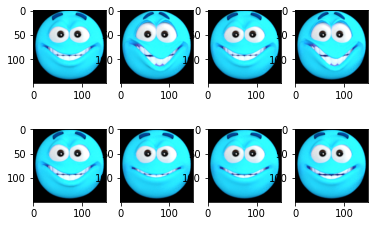

In [100]:
for i in range(8):
    plt.subplot(240+1+i)
    path = os.path.join(happy_images_path, happy_images[i])
    img = cv2.imread(path)
    plt.imshow(img)
plt.show()

In [101]:
callbacks = myCallback()

In [102]:
 model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),   
      tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Flatten(),                
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

In [103]:
model.compile(optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [104]:
history = model.fit_generator(train_generator, epochs=20,steps_per_epoch=2, callbacks=[callbacks])

Epoch 1/20
2/2 [==============================] - 0s 48ms/step - loss: 3.1295 - accuracy: 0.3000
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.6590 - accuracy: 0.6000
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.6367 - accuracy: 0.7000
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.6046 - accuracy: 0.7000
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.6881 - accuracy: 0.6000
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.4974 - accuracy: 0.9000
Epoch 7/20
2/2 [==============================] - ETA: 0s - loss: 0.3400 - accuracy: 1.0000
Reached 99% accuracy so cancelling training!
2/2 [==============================] - 0s 47ms/step - loss: 0.3400 - accuracy: 1.0000


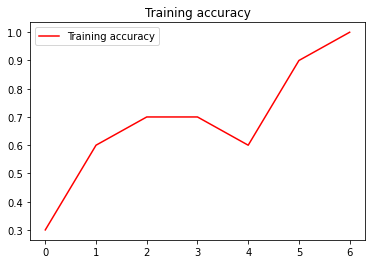

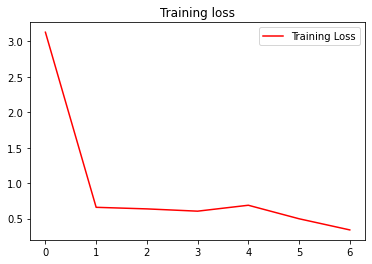

In [106]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()